<h1>Final Project</h1><h2>COS60008 Introduction to Data Science - Semester 1 2020</h2><h5>Data Pre-Processing:</h5><p> Loading file in a dataframe, Validating if the df has data equal to the raw file, checking duplicates if exist then drop, stripping extra white spaces, renaming columns, replacing cells having 'Â' to null, checking for sum of null values in each column, storing all null values as boolean in an object, Calculating Correlation Cofficient for missing values filling, Filling beantype and broadbeanorigin missing values. <br><br> Modifying Cocoa Percent Column by #Removing % symbol and dividing by hundred as its percentage and converting it to float, Modifying CompanyLocation Column as it has full stops so removig any symbols from this column  <br><br> Modifying Company Column by removing symbols and cleaning column Company as it has makers and melters both names, so replacing the melters names with makers names if known, Creating a dictionary for bean type varieties and hence creating anew column beantype variety -  <br><br> Creating a new column BroadBeanOrigin as original BroadBeanOrigin column has multiple country names for one value and Replacing value with multiple if more than 1 country name, Creating a new column SpecificBeanOriginModified
#Removing special characters in string and removing unnecessary information by splitting through first comma(,) -<br><h5>Model Development:</h5><p> Creating binned column using cut() for target variable, Creating Dummy Variables, calculating correlation cofficient for feature selection, data partitioning for train test split, printitng train and test data. Model Development, Hyperparameter tuning, cross validation score calculation, performance assesment, random forest classifier final model development, printing accuracy and confusion matrix, creating model.pickle binary file, creating visualisations for bonus part 

<h2>1- Data Pre-processing</h2>

In [2]:
#This assignment is supervised learning 

#Importing Libraries

#Importing pandas library
import pandas as pd

#Importing numpy library
import numpy as np

#Importing library Regex
import re

#Creating dataframe 1 and storing data from data1.csv
#Using utf-8 encoding as the dataset has symbols.
df = pd.read_csv("chocolate.csv", encoding='utf-8')

#Checking if dataframe1 has the same data as data1.csv
df.equals(pd.read_csv("chocolate.csv"))

df.shape

E:\Anaconda\lib\site-packages\pandas\core\dtypes\missing.py:404: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



(1500, 9)

In [3]:
#Droping the duplicates and keeping the first one
df.drop_duplicates(keep="first", inplace = True)

#Drop row if more than 50% of data missing
df.dropna(thresh=5, inplace = True)

for column in df:

    #Selecting datatype of columns
    datatype = df[column].dtypes
    
    #Checking if the columns' datatype is object i.e. has string values
    if datatype=="object":
        #Removing all leading and trailing whitespaces i.e extra whitespaces from the data
        df[column] = df[column].str.strip()

#Changing column names as the original names were have symbols such as (), -, \n etc. Easy to access names are specified now
df.columns = ['Company','SpecificBeanOrigin','REF',
                     'ReviewDate','CocoaPercent','CompanyLocation','Rating','BeanType','BroadBeanOrigin']
#Printing Shape        
df.shape

(1500, 9)

In [4]:
#Calculating null values sum for every column
df.isnull().sum()
#For Column BeanType one value is Null and 750 values have 'Â'
#For Column BroadBeanOrigin one value is Null and 750 values have 'Â'
#Converting all to null values 
df['BeanType']=df['BeanType'].str.strip().replace('',np.nan)
df['BroadBeanOrigin']=df['BroadBeanOrigin'].str.strip().replace('',np.nan)
#Calculating null values sum for every column
print("Sum of Null Values in Columns")
print(df.isnull().sum())
# Storing null values in an object
a = df.isnull()

Sum of Null Values in Columns
Company                 0
SpecificBeanOrigin      0
REF                     0
ReviewDate              0
CocoaPercent            0
CompanyLocation         0
Rating                  0
BeanType              751
BroadBeanOrigin        62
dtype: int64


In [5]:
# Calculating Corelation Cofficient so missing values can be filled
#df["Company"] =df["Company"].astype('category').cat.codes
#df['SpecificBeanOrigin'] =df['SpecificBeanOrigin'].astype('category').cat.codes
#df['CocoaPercent'] =df['CocoaPercent'].astype('category').cat.codes
#df['CompanyLocation'] =df['CompanyLocation'].astype('category').cat.codes
#df['BeanType'] =df['BeanType'].astype('category').cat.codes
#df['BroadBeanOrigin'] =df['BroadBeanOrigin'].astype('category').cat.codes
#a = df[df.columns[0:]].corr()['Rating'][:]
#a.sort_values(ascending=False)

In [6]:
#Filling missing values of BeanType column

#Storing data in a variable from main df, taking all columns with high correlation cofficient to beantype column
data_BeanType = [df["BroadBeanOrigin"],df["Rating"],df["SpecificBeanOrigin"], df["BeanType"]]
#Initializing header for the df
headers = [ "BroadBeanOrigin", "Rating", "SpecificBeanOrigin", "BeanType"]
#Creating df from data stored in variable header for the df
df_BeanType = pd.concat(data_BeanType, axis=1, keys=headers)
df_BeanType = df_BeanType.dropna()
df_BeanType['Combined']=df_BeanType['BroadBeanOrigin']+'|'+df_BeanType['Rating'].map(str)+'|'+df_BeanType['SpecificBeanOrigin']
df_BeanType.sort_values(by='Combined', inplace=True)
df_BeanType.drop(columns=['BroadBeanOrigin','Rating','SpecificBeanOrigin'], inplace=True)
df_BeanType = df_BeanType.groupby(['Combined'])['BeanType'].agg(lambda x:x.value_counts().index[0]).reset_index()
mydictionaryOfBeanType = pd.Series(df_BeanType.BeanType.values,index=df_BeanType.Combined).to_dict()

data_BeanType1 = [df["BroadBeanOrigin"],df["Rating"], df["BeanType"]]
headers = [ "BroadBeanOrigin", "Rating", "BeanType"]
df_BeanType1 = pd.concat(data_BeanType1, axis=1, keys=headers)
df_BeanType1 = df_BeanType1.dropna()
df_BeanType1['Combined1']=df_BeanType1['BroadBeanOrigin']+'|'+df_BeanType1['Rating'].map(str)
df_BeanType1.sort_values(by='Combined1', inplace=True)
df_BeanType1.drop(columns=['BroadBeanOrigin','Rating'], inplace=True)
df_BeanType1 = df_BeanType1.groupby(['Combined1'])['BeanType'].agg(lambda x:x.value_counts().index[0]).reset_index()
mydictionaryOfBeanType1 = pd.Series(df_BeanType1.BeanType.values,index=df_BeanType1.Combined1).to_dict()

data_BeanType2 = [df["BroadBeanOrigin"], df["BeanType"]]
headers = [ "BroadBeanOrigin", "BeanType"]
df_BeanType2 = pd.concat(data_BeanType2, axis=1, keys=headers)
df_BeanType2 = df_BeanType2.dropna()
df_BeanType2.sort_values(by='BroadBeanOrigin', inplace=True)
df_BeanType2 = df_BeanType2.groupby(['BroadBeanOrigin'])['BeanType'].agg(lambda x:x.value_counts().index[0]).reset_index()
mydictionaryOfBeanType2 = pd.Series(df_BeanType2.BeanType.values,index=df_BeanType2.BroadBeanOrigin).to_dict()

data_BeanType3 = [df["Rating"], df["BeanType"]]
headers = [ "Rating", "BeanType"]
df_BeanType3 = pd.concat(data_BeanType3, axis=1, keys=headers)
df_BeanType3 = df_BeanType3.dropna()
df_BeanType3.sort_values(by='Rating', inplace=True)
df_BeanType3 = df_BeanType3.groupby(['Rating'])['BeanType'].agg(lambda x:x.value_counts().index[0]).reset_index()
mydictionaryOfBeanType3 = pd.Series(df_BeanType3.BeanType.values,index=df_BeanType3.Rating).to_dict()


for ind in df["BeanType"].index:
    if a["BeanType"][ind]==True: 
        compare = str(df['BroadBeanOrigin'][ind])+'|'+str(df['Rating'][ind])+'|'+str(df['SpecificBeanOrigin'][ind])
        compare1 = str(df['BroadBeanOrigin'][ind])+'|'+str(df['Rating'][ind])
        compare2 = df['BroadBeanOrigin'][ind]
        compare3 = df['Rating'][ind]
        if(str(mydictionaryOfBeanType.get(compare))=="None"):
            if(str(mydictionaryOfBeanType1.get(compare1))=="None"):
                if(str(mydictionaryOfBeanType2.get(compare2))=="None"):
                    #print("Index: ",ind, " updated to BeanType: ",mydictionaryOfBeanType3.get(compare3)," | Key: ",compare3)
                    df['BeanType'][ind] = mydictionaryOfBeanType3.get(compare3)
                else:
                    #print("Index: ",ind, " updated to BeanType: ",mydictionaryOfBeanType2.get(compare2)," | Key: ",compare2)
                    df['BeanType'][ind] = mydictionaryOfBeanType2.get(compare2)
            else:
                #print("Index: ",ind, " updated to BeanType: ",mydictionaryOfBeanType1.get(compare1)," | Key: ",compare1)
                df['BeanType'][ind] = mydictionaryOfBeanType1.get(compare1)
        else:
            #print("Index: ",ind, " updated to BeanType: ",mydictionaryOfBeanType.get(compare)," | Key: ",compare)
            df['BeanType'][ind] = mydictionaryOfBeanType.get(compare)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [7]:
#Filling missing values of BroadBeanOrigin

data_BroadBeanOrigin = [df["SpecificBeanOrigin"], df["BeanType"],df["BroadBeanOrigin"]]
headers = ["SpecificBeanOrigin", "BeanType", "BroadBeanOrigin"]
df_BroadBeanOrigin = pd.concat(data_BroadBeanOrigin, axis=1, keys=headers)
df_BroadBeanOrigin = df_BroadBeanOrigin.dropna()
df_BroadBeanOrigin['Combined']=df_BroadBeanOrigin['SpecificBeanOrigin']+'|'+df_BroadBeanOrigin['BeanType']
df_BroadBeanOrigin.sort_values(by='Combined', inplace=True)
df_BroadBeanOrigin.drop(columns=['SpecificBeanOrigin','BeanType'], inplace=True)
df_BroadBeanOrigin = df_BroadBeanOrigin.groupby(['Combined'])['BroadBeanOrigin'].agg(lambda x:x.value_counts().index[0]).reset_index()
mydictionaryOfBroadBeanOrigin = pd.Series(df_BroadBeanOrigin.BroadBeanOrigin.values,index=df_BroadBeanOrigin.Combined).to_dict()

data_BroadBeanOrigin1 = [df["SpecificBeanOrigin"],df["BroadBeanOrigin"]]
headers = ["SpecificBeanOrigin", "BroadBeanOrigin"]
df_BroadBeanOrigin1 = pd.concat(data_BroadBeanOrigin1, axis=1, keys=headers)
df_BroadBeanOrigin1 = df_BroadBeanOrigin1.dropna()
df_BroadBeanOrigin1.sort_values(by='SpecificBeanOrigin', inplace=True)
df_BroadBeanOrigin1 = df_BroadBeanOrigin1.groupby(['SpecificBeanOrigin'])['BroadBeanOrigin'].agg(lambda x:x.value_counts().index[0]).reset_index()
mydictionaryOfBroadBeanOrigin1 = pd.Series(df_BroadBeanOrigin1.BroadBeanOrigin.values,index=df_BroadBeanOrigin1.SpecificBeanOrigin).to_dict()

data_BroadBeanOrigin2 = [df["BeanType"],df["BroadBeanOrigin"]]
headers = ["BeanType", "BroadBeanOrigin"]
df_BroadBeanOrigin2 = pd.concat(data_BroadBeanOrigin2, axis=1, keys=headers)
df_BroadBeanOrigin2 = df_BroadBeanOrigin2.dropna()
df_BroadBeanOrigin2.sort_values(by='BeanType', inplace=True)
df_BroadBeanOrigin2 = df_BroadBeanOrigin2.groupby(['BeanType'])['BroadBeanOrigin'].agg(lambda x:x.value_counts().index[0]).reset_index()
mydictionaryOfBroadBeanOrigin2 = pd.Series(df_BroadBeanOrigin2.BroadBeanOrigin.values,index=df_BroadBeanOrigin2.BeanType).to_dict()

for ind in df["BroadBeanOrigin"].index:
    if a["BroadBeanOrigin"][ind]==True: 
        compare = df['SpecificBeanOrigin'][ind]+'|'+df['BeanType'][ind]
        compare1 = df['SpecificBeanOrigin'][ind]
        compare2 = df['BeanType'][ind]
        if(str(mydictionaryOfBroadBeanOrigin.get(compare))=="None"):
            if(str(mydictionaryOfBroadBeanOrigin1.get(compare1))=="None"):
                #print("Index: ",ind, " updated to BroadBeanOrigin: ",mydictionaryOfBroadBeanOrigin2.get(compare2)," | Key: ",compare2)
                df['BroadBeanOrigin'][ind] = mydictionaryOfBroadBeanOrigin2.get(compare2)
            else:
                #print("Index: ",ind, " updated to BroadBeanOrigin: ",mydictionaryOfBroadBeanOrigin1.get(compare1)," | Key: ",compare1)
                df['BroadBeanOrigin'][ind] = mydictionaryOfBroadBeanOrigin1.get(compare1)
        else:
            #print("Index: ",ind, " updated to BroadBeanOrigin: ",mydictionaryOfBroadBeanOrigin.get(compare)," | Key: ",compare)
            df['BroadBeanOrigin'][ind] = mydictionaryOfBroadBeanOrigin.get(compare)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [8]:
#After filling values, checking null values sum for every column
df.isnull().sum()

Company               0
SpecificBeanOrigin    0
REF                   0
ReviewDate            0
CocoaPercent          0
CompanyLocation       0
Rating                0
BeanType              0
BroadBeanOrigin       0
dtype: int64

In [9]:
#Removing % symbol and dividing by hundred as its percentage and converting it to float
df['CocoaPercent'] = df['CocoaPercent'].str.replace('%','').astype(float)/100
df.head()

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,Valrhona,Manjari,129,2007,0.64,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,0.80,Switzerland,3.25,Blend,Hawaii
2,Potomac,Upala w/ nibs,647,2011,0.70,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,0.70,U.S.A.,3.50,"Criollo, Trinitario",Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,0.65,Colombia,3.50,CCN51,Colombia


In [10]:
#Printing all unique values for column CompanyLocation to check for any discreapancies
df['CompanyLocation'].unique()
#There are some values with full stops hence removing them
df['CompanyLocation'] = df['CompanyLocation'].str.replace('.', '')
df.head()

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,Valrhona,Manjari,129,2007,0.64,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,0.80,Switzerland,3.25,Blend,Hawaii
2,Potomac,Upala w/ nibs,647,2011,0.70,USA,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,0.70,USA,3.50,"Criollo, Trinitario",Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,0.65,Colombia,3.50,CCN51,Colombia


In [11]:
#Cleaning column Company as it has makers and melters both names, so replacing the melters names with makers names if known 
def Clean_Comp(Company): 
    # Search for opening brackets with aka
    if re.search('\(aka.*', Company):
        p = re.search('\(aka.*', Company).start()+5
        p2 = re.search('.*\)', Company).end()-1
        return Company[p:p2]
    
    # Search for opening brackets
    elif re.search('\(.*', Company): 
        pos = re.search('\(.*', Company).start()+1
        pos2 = re.search('.*\)', Company).end()-1
        return Company[pos:pos2] 
  
    else: 
       
        return Company 

df['Company'] = df['Company'].apply(Clean_Comp) 
  
# Print the updated dataframe 
df.head()

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,Valrhona,Manjari,129,2007,0.64,France,4.00,"Criollo, Trinitario",Madagascar
1,Felchlin,"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,0.80,Switzerland,3.25,Blend,Hawaii
2,Potomac,Upala w/ nibs,647,2011,0.70,USA,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,0.70,USA,3.50,"Criollo, Trinitario",Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,0.65,Colombia,3.50,CCN51,Colombia


In [12]:
#Creating a dictionary and index match it to the dataframe by creating a new column called “BeanTypeVariety” 
#based on the rules below which are resulted from a thorough research on BeanType:

#Forastero if exact; matches ‘Amazon’; is ‘Beniano’, ‘Nacional’; or ‘Nacional (Arriba)’; 
#or specifies the subspecies ‘Amelonado’, ‘Arriba’, ‘Catongo’, ‘Nacional’, or ‘Parazinho’.
#Criollo if exact; or specifies the subspecies ‘Amarru’, ‘Porcelana’ or ‘Wild’.
#Trinatario if exact; is ‘Trinitario, TCGA’; or specifies the subspecies ‘Amelonado’ or ‘Scavina’.
#blend if matches ‘blend’; or mixes any of the three main varieties.
#hybrid if is ‘Matina’ or EET’; or matches ‘CCN’ or ‘Ocumare’

dict_type = {'Amazon':'Forastero', 
                  'Amazon mix':'Forastero',
                  'Amazon, ICS':'Forastero',
                  'Beniano':'Forastero',
                  'Blend':'blend',
                  'Blend-Forastero,Criollo':'blend',
                  'CCN51':'hybrid',
                  'Criollo':'Criollo',
                  'Criollo (Amarru)':'Criollo',
                  'Criollo (Ocumare 61)':'hybrid',
                  'Criollo (Ocumare 67)':'hybrid',
                  'Criollo (Ocumare 77)':'hybrid',
                  'Criollo (Ocumare)':'hybrid',
                  'Criollo (Porcelana)':'Criollo',
                  'Criollo (Wild)':'Criollo',
                  'Criollo, +':'Criollo',
                  'Criollo, Forastero':'blend',
                  'Criollo, Trinitario':'blend',
                  'EET':'hybrid',
                  'Forastero':'Forastero',
                  'Forastero (Amelonado)':'Forastero',
                  'Forastero (Arriba)':'Forastero',
                  'Forastero (Arriba) ASS':'Forastero',
                  'Forastero (Arriba) ASSS':'Forastero',
                  'Forastero (Catongo)':'Forastero',
                  'Forastero (Nacional)':'Forastero',
                  'Forastero (Parazinho)':'Forastero',
                  'Forastero(Arriba, CCN)':'hybrid',
                  'Forastero, Trinitario':'blend',
                  'Matina':'hybrid',
                  'Nacional':'Forastero',
                  'Nacional (Arriba)':'Forastero',
                  'Trinitario':'Trinitario',
                  'Trinitario (85% Criollo)':'blend',
                  'Trinitario (Amelonado)':'Trinitario',
                  'Trinitario (Scavina)':'Trinitario',
                  'Trinitario, Criollo':'blend',
                  'Trinitario, Forastero':'blend',
                  'Trinitario, Nacional':'blend',
                  'Trinitario, TCGA':'Trinitario',
                  'blend':'blend'}
#Inserting the column in df
df.insert(8, 'BeanTypeVariety', df['BeanType'].map(dict_type))

In [13]:
#Creating a new column BroadBeanOrigin as original BroadBeanOrigin column has multiple country names for one value 
#Replacing value with multiple if more than 1 country name
df['BroadBeanOriginModified'] = df['BroadBeanOrigin']
#Removing &, and from values and replacing those values with multipe
i=0
while i < len(df['BroadBeanOriginModified']):
    if (','or'and'or'&'or'/'or'-') in df['BroadBeanOriginModified'].loc[i]:
        df['BroadBeanOriginModified'].loc[i] = 'Multiple'
    i+=1 
df['BroadBeanOriginModified'] = df['BroadBeanOriginModified'].map(lambda x: re.sub(r'\&+and','',x))


E:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [14]:
#Creating a new column SpecificBeanOriginModified
#Removing special characters in string and removing unnecessary information by splitting through first comma(,)
df.insert(2, 'SpecificBeanOriginCleaned', df['SpecificBeanOrigin'].str.split(',').str[0])
df['SpecificBeanOriginCleaned'] = df['SpecificBeanOriginCleaned'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()
#Printing Updated Dataframe
df.head()

,Company,SpecificBeanOrigin,SpecificBeanOriginCleaned,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BeanTypeVariety,BroadBeanOrigin,BroadBeanOriginModified
0,Valrhona,Manjari,Manjari,129,2007,0.64,France,4.00,"Criollo, Trinitario",blend,Madagascar,Madagascar
1,Felchlin,"Grand Cru Blend No.1, 5 yr. Anniversary Ed",Grand Cru Blend No,1442,2014,0.80,Switzerland,3.25,Blend,blend,Hawaii,Hawaii
2,Potomac,Upala w/ nibs,Upala w nibs,647,2011,0.70,USA,3.50,Matina,hybrid,Costa Rica,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",Matagalpa,1538,2015,0.70,USA,3.50,"Criollo, Trinitario",blend,Nicaragua,Nicaragua
4,Carlotta Chocolat,Cesar,Cesar,1888,2016,0.65,Colombia,3.50,CCN51,hybrid,Colombia,Colombia


In [15]:
#Printing the final dataframe after data preparation
df.head()

,Company,SpecificBeanOrigin,SpecificBeanOriginCleaned,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BeanTypeVariety,BroadBeanOrigin,BroadBeanOriginModified
0,Valrhona,Manjari,Manjari,129,2007,0.64,France,4.00,"Criollo, Trinitario",blend,Madagascar,Madagascar
1,Felchlin,"Grand Cru Blend No.1, 5 yr. Anniversary Ed",Grand Cru Blend No,1442,2014,0.80,Switzerland,3.25,Blend,blend,Hawaii,Hawaii
2,Potomac,Upala w/ nibs,Upala w nibs,647,2011,0.70,USA,3.50,Matina,hybrid,Costa Rica,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",Matagalpa,1538,2015,0.70,USA,3.50,"Criollo, Trinitario",blend,Nicaragua,Nicaragua
4,Carlotta Chocolat,Cesar,Cesar,1888,2016,0.65,Colombia,3.50,CCN51,hybrid,Colombia,Colombia


<h2>2- Learning Type of the problem:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - It is a supervised learning. Solving it as a Classification Problem.</h2>

In [16]:
#Solving this as a classifcation problem so using cut() for rating column and creating bins
#Rating 5 has only 2 samples so putting that in 4, as gridsearch will use 3 folds, so minimum samples needed are 3
cut_labels = ['1', '2', '3', '4']
cut_bins = [0, 1.999, 2.999, 3.999, 5]
#Creating new column cut_rating which has binned values for rating
df['cut_rating'] = pd.cut(df['Rating'], bins=cut_bins, labels=cut_labels)

<h2>3- Three learning algorithms and their hyperparamenters with possible values for tuning:</h2>
<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DecisionTreeClassifier - max_depth=[1,3,5], min_samples_split = [2,5,7], min_samples_leaf = [10,20,30]</h5>
<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;KNeighborsClassifier - n_neighbors = [25,27,29,30], leaf_size = [1,3,5], p=[1,2]</h5>
<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RandomForestClassifier - n_estimators= [1,3,5,7,10], max_depth=[1,3,5,7,9], min_samples_split = [2, 5,7,9], min_samples_leaf = [1, 2, 4]</h5>

In [17]:
# Calculating Corelation Cofficient for feature selection 
#df["Company"] =df["Company"].astype('category').cat.codes
#df['SpecificBeanOrigin'] =df['SpecificBeanOrigin'].astype('category').cat.codes
#df['CocoaPercent'] =df['CocoaPercent'].astype('category').cat.codes
#df['CompanyLocation'] =df['CompanyLocation'].astype('category').cat.codes
#df['BeanType'] =df['BeanType'].astype('category').cat.codes
#df['SpecificBeanOriginCleaned'] =df['SpecificBeanOriginCleaned'].astype('category').cat.codes
#df['BeanTypeVariety'] =df['BeanTypeVariety'].astype('category').cat.codes
#df['BroadBeanOrigin'] =df['BroadBeanOrigin'].astype('category').cat.codes
#df['cut_rating'] =df['cut_rating'].astype('category').cat.codes
#df['BroadBeanOriginModified'] =df['BroadBeanOriginModified'].astype('category').cat.codes
#a = df[df.columns[0:]].corr()['cut_rating'][:]
#Sorting in ascending after applyinga bsolute 
#abs(a).sort_values(ascending=False)

In [18]:
#Explanation for feature selection
#BroadBeanOrigin              1.000000
#BroadBeanOriginModified      0.982772
#The correlation cofficient between these two is 98% thats why using only one for modelling the modified one.
#SpecificBeanOrigin           1.000000
#SpecificBeanOriginCleaned    0.990193
#The correlation cofficient between these two is 99% thats why using only one for modelling the modified one.

In [19]:
#Creating a seperate Dataframe for X which has model feautures
df_X = df.copy()

#Creating Dummy Variables since a prediction model cannot work with categorical variables

#Creating Dummy Variable for SpecificBeanOriginCleaned
dummy_SpecBeanOrgCleaned = pd.get_dummies(df['SpecificBeanOriginCleaned'], prefix="Spec_Bean_Org")
df_X = pd.concat([df_X,dummy_SpecBeanOrgCleaned], axis = 1)

#Creating Dummy Variable for BeanTypeVariety
dummy_BeanTypeVariety = pd.get_dummies(df['BeanTypeVariety'], prefix="BeanTypVar")
df_X = pd.concat([df_X,dummy_BeanTypeVariety], axis = 1)

#Creating Dummy Variable for CompanyLocation
dummy_ComLoc = pd.get_dummies(df['CompanyLocation'], prefix="Com_Loc")
df_X = pd.concat([df_X,dummy_ComLoc], axis = 1)

#Creating Dummy Variable for BroadBeanOrigin
dummy_BroadBeanOrigin = pd.get_dummies(df['BroadBeanOrigin'], prefix="BroadBeanOrg")
df_X = pd.concat([df_X,dummy_BroadBeanOrigin], axis = 1)

df_X.head()

,Company,SpecificBeanOrigin,SpecificBeanOriginCleaned,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BeanTypeVariety,...,"BroadBeanOrg_Ven., Trinidad, Mad.","BroadBeanOrg_Ven.,Ecu.,Peru,Nic.","BroadBeanOrg_Venez,Africa,Brasil,Peru,Mex",BroadBeanOrg_Venezuela,"BroadBeanOrg_Venezuela, Dom. Rep.","BroadBeanOrg_Venezuela, Ghana","BroadBeanOrg_Venezuela, Java","BroadBeanOrg_Venezuela, Trinidad",BroadBeanOrg_Vietnam,BroadBeanOrg_West Africa
0,Valrhona,Manjari,Manjari,129,2007,0.64,France,4.00,"Criollo, Trinitario",blend,...,0,0,0,0,0,0,0,0,0,0
1,Felchlin,"Grand Cru Blend No.1, 5 yr. Anniversary Ed",Grand Cru Blend No,1442,2014,0.80,Switzerland,3.25,Blend,blend,...,0,0,0,0,0,0,0,0,0,0
2,Potomac,Upala w/ nibs,Upala w nibs,647,2011,0.70,USA,3.50,Matina,hybrid,...,0,0,0,0,0,0,0,0,0,0
3,Middlebury,"Matagalpa, Cacao Bisiesto",Matagalpa,1538,2015,0.70,USA,3.50,"Criollo, Trinitario",blend,...,0,0,0,0,0,0,0,0,0,0
4,Carlotta Chocolat,Cesar,Cesar,1888,2016,0.65,Colombia,3.50,CCN51,hybrid,...,0,0,0,0,0,0,0,0,0,0


<h2>4- Code for data partitioning. Printing the training data and the test data.</h2>

In [20]:
#Dropping the redundant columns
df_X = df_X.drop(['ReviewDate','SpecificBeanOrigin', 'SpecificBeanOriginCleaned','BroadBeanOrigin','BroadBeanOriginModified', 'Rating','BeanTypeVariety','BeanType', 'CompanyLocation','Company','cut_rating'], axis=1)

X= df_X

#Initializing Target Label as y
y=df.cut_rating

#Importing train_test_split
from sklearn.model_selection import train_test_split

#Train_test_split Suite for 70:30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=76543)



In [21]:
#Printing X_train
X_train.head()

,REF,CocoaPercent,Spec_Bean_Org_A case of the Xerces Blues,Spec_Bean_Org_ABOCFA Coop,Spec_Bean_Org_Abstract S w Jamaica nibs,Spec_Bean_Org_Acarigua,Spec_Bean_Org_Acopagro,Spec_Bean_Org_Acul du Nord,Spec_Bean_Org_Africa,Spec_Bean_Org_AgroCriso Plantation,...,"BroadBeanOrg_Ven., Trinidad, Mad.","BroadBeanOrg_Ven.,Ecu.,Peru,Nic.","BroadBeanOrg_Venez,Africa,Brasil,Peru,Mex",BroadBeanOrg_Venezuela,"BroadBeanOrg_Venezuela, Dom. Rep.","BroadBeanOrg_Venezuela, Ghana","BroadBeanOrg_Venezuela, Java","BroadBeanOrg_Venezuela, Trinidad",BroadBeanOrg_Vietnam,BroadBeanOrg_West Africa
1213,1311,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1314,1205,1.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,781,0.68,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563,963,0.66,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,1716,0.78,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Printing X_test
X_test.head()

,REF,CocoaPercent,Spec_Bean_Org_A case of the Xerces Blues,Spec_Bean_Org_ABOCFA Coop,Spec_Bean_Org_Abstract S w Jamaica nibs,Spec_Bean_Org_Acarigua,Spec_Bean_Org_Acopagro,Spec_Bean_Org_Acul du Nord,Spec_Bean_Org_Africa,Spec_Bean_Org_AgroCriso Plantation,...,"BroadBeanOrg_Ven., Trinidad, Mad.","BroadBeanOrg_Ven.,Ecu.,Peru,Nic.","BroadBeanOrg_Venez,Africa,Brasil,Peru,Mex",BroadBeanOrg_Venezuela,"BroadBeanOrg_Venezuela, Dom. Rep.","BroadBeanOrg_Venezuela, Ghana","BroadBeanOrg_Venezuela, Java","BroadBeanOrg_Venezuela, Trinidad",BroadBeanOrg_Vietnam,BroadBeanOrg_West Africa
449,1454,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,355,0.64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,761,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1402,887,0.81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,202,1.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Printing y_train
y_train.head()

1213    3
1314    2
156     3
563     3
901     3
Name: cut_rating, dtype: category
Categories (4, object): [1 < 2 < 3 < 4]

In [24]:
#Printing y_test
y_test.head()

449     3
514     3
152     2
1402    2
744     3
Name: cut_rating, dtype: category
Categories (4, object): [1 < 2 < 3 < 4]

<h2>5- Model Development</h2>


 <h3>5.1- Using GridSearchCV: Expanding Learning algorithms on their hyperparameters for hyperparameter tuning, to derive best possible values for hyperparameters.</h3>

In [25]:
#Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

#Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Maximum number of levels in tree
max_depth=[1,3,5]

# Minimum number of samples required to split a node
min_samples_split = [2,5,7]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30]

#Creating a Dictionary for storing Hyperparameters
hyperparameters_DT = dict(max_depth = max_depth, min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf)

#Creating new RF model object for Random Forest Classifier
DT = DecisionTreeClassifier()

#Applying GridSearch for 3 folds
clf_DT = GridSearchCV(DT, hyperparameters_DT, cv=3)

#Fitting the model
best_model_DT = clf_DT.fit(X_train,y_train)

#Printing the value of best Hyperparameters
print("Tuned Best Hyperparameters for Decision Tree:\n")
print('Best max_depth:', best_model_DT.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model_DT.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', best_model_DT.best_estimator_.get_params()['min_samples_leaf'])

Tuned Best Hyperparameters for Decision Tree:

('Best max_depth:', 1)
('Best min_samples_split:', 2)
('Best min_samples_leaf:', 10)


In [26]:
#Importing K-NearestNeighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

#Listing Hyperparameters that we want to tune for KNN

#Tuning parameters for KNN
n_neighbors = [25,27,29,30]
leaf_size = [1,3,5]
p=[1,2]

#Creating a Dictionary for storing Hyperparameters
hyperparameters_KNN = dict(n_neighbors=n_neighbors,leaf_size= leaf_size, p =p)

#Creating new KNN object for KNN Classifier
knn = KNeighborsClassifier()

#Applying GridSearch for 3 folds
clf_knn = GridSearchCV(knn, hyperparameters_KNN, cv=3)

#Fitting the model
best_model_knn = clf_knn.fit(X_train,y_train)

#Printing the value of best Hyperparameters
print("Tuned Best Hyperparameters for KNN:\n")
print('Best leaf_size:', best_model_knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_knn.best_estimator_.get_params()['n_neighbors'])

Tuned Best Hyperparameters for KNN:

('Best leaf_size:', 1)
('Best p:', 1)
('Best n_neighbors:', 27)


In [27]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators= [1,3,5,7,10]

# Maximum number of levels in tree
max_depth=[1,3,5,7,9]

# Minimum number of samples required to split a node
min_samples_split = [2, 5,7,9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Creating a Dictionary for storing Hyperparameters
hyperparameters_RF = dict(n_estimators=n_estimators,max_depth = max_depth, min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf)

#Creating new RF model object for Random Forest Classifier
RF = RandomForestClassifier()

#Applying GridSearch for 3 folds
clf_RF = GridSearchCV(RF, hyperparameters_RF, cv=3)

#Fitting the model
best_model_RF = clf_RF.fit(X_train,y_train)

#Printing the value of best Hyperparameters
print("Tuned Best Hyperparameters for Random Forest:\n")
print('Best n_estimators:', best_model_RF.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model_RF.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model_RF.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', best_model_RF.best_estimator_.get_params()['min_samples_leaf'])

Tuned Best Hyperparameters for Random Forest:

('Best n_estimators:', 10)
('Best max_depth:', 9)
('Best min_samples_split:', 2)
('Best min_samples_leaf:', 1)


 <h3>5.2- Using Cross_Val_Score: Assessing the validation performance for each learning algorithm by incorporating the derived best values of hyperparameters calculated in the above step</h3>
 <h3>5.3- Printing mean P over folds i.e. 3, 4, 5 and the selected model is Random forest as it has the highest validation performance over all folds as compare to other learning algorithms </h3>

In [28]:
#Importing Cross Validation Score
from sklearn.model_selection import cross_val_score

# Validation Performance assessment for Decision tree 

#Using the best tuned hyperparameters
DT = DecisionTreeClassifier(max_depth=1, min_samples_leaf=2,min_samples_split=10, random_state=4531) 

#Calculating Cross Validation Score for 3 folds
scores1 = cross_val_score(DT, X_train,y_train, cv=3)
print ("Validation Performance for Decision Tree Model:\n")
print('Validation Performance for 3 Folds: '+ str(scores1))
S1=scores1.mean()
print("Mean Validation Performance over 3 Folds: " +str(S1)+"\n")

#Calculating Cross Validation Score for 4 folds
scores2 = cross_val_score(DT, X_train,y_train, cv=4)
print("Validation Performance for 4 Folds: "+ str(scores2))
S2=scores2.mean()
print("Mean Validation Performance over 3 Folds: "+ str(S2)+"\n")

#Calculating Cross Validation Score for 5 folds
scores3 = cross_val_score(DT, X_train,y_train, cv=5)
print("Validation Performance for 5 Folds: "+ str(scores3))
S3=scores3.mean()
print("Mean Validation Performance over 5 Folds: "+str(S3)+"\n")


# Validation Performance assessment for K-Nearest Neighbors 

#Using the best tuned hyperparameters
knn = KNeighborsClassifier(leaf_size=1,p=1,n_neighbors = 27)

#Calculating Cross Validation Score for 3 folds
scores1 = cross_val_score(knn, X_train,y_train, cv=3)
print ("------------------------------------------------------------------------------------------------")
print ("\nValidation Performance for K-Nearest Neighbors Model:\n")
print('Validation Performance for 3 Folds: '+ str(scores1))
S1=scores1.mean()
print("Mean Validation Performance over 3 Folds: " +str(S1)+"\n")

#Calculating Cross Validation Score for 4 folds
scores2 = cross_val_score(knn, X_train,y_train, cv=4)
print("Validation Performance for 4 Folds: "+ str(scores2))
S2=scores2.mean()
print("Mean Validation Performance over 3 Folds: "+ str(S2)+"\n")

#Calculating Cross Validation Score for 5 folds
scores3 = cross_val_score(knn, X_train,y_train, cv=5)
print("Validation Performance for 5 Folds: "+ str(scores3))
S3=scores3.mean()
print("Mean Validation Performance over 5 Folds: "+str(S3)+"\n")


# Validation Performance assessment for Random Forest

#Using the best tuned hyperparameters
RF = RandomForestClassifier(n_estimators=3, max_depth=3, min_samples_split = 7, min_samples_leaf = 1,random_state=34560)

#Calculating Cross Validation Score for 3 folds
score1 = cross_val_score(RF, X_train,y_train, cv=3)
print ("------------------------------------------------------------------------------------------------")
print ("\nValidation Performance for Random Forest Model:\n")
print('Validation Performance for 3 Folds: '+ str(score1))
S1=score1.mean()
print("Mean Validation Performance over 3 Folds: " +str(S1)+"\n")

#Calculating Cross Validation Score for 4 folds
score2 = cross_val_score(RF, X_train,y_train, cv=4)
print("Validation Performance for 4 Folds: "+ str(score2))
S2=score2.mean()
print("Mean Validation Performance over 3 Folds: "+ str(S2)+"\n")

#Calculating Cross Validation Score for 5 folds
score3 = cross_val_score(RF, X_train,y_train, cv=5)
print("Validation Performance for 5 Folds: "+ str(score3))
S3=score3.mean()
print("Mean Validation Performance over 5 Folds: "+str(S3)+"\n")




Validation Performance for Decision Tree Model:

Validation Performance for 3 Folds: [0.68181818 0.68481375 0.68481375]
Mean Validation Performance over 3 Folds: 0.6838152296605019

Validation Performance for 4 Folds: [0.65283019 0.68441065 0.68582375 0.68582375]
Mean Validation Performance over 3 Folds: 0.6772220861614056

Validation Performance for 5 Folds: [0.68246445 0.68246445 0.68246445 0.68421053 0.6875    ]
Mean Validation Performance over 5 Folds: 0.6838207782489399

------------------------------------------------------------------------------------------------

Validation Performance for K-Nearest Neighbors Model:

Validation Performance for 3 Folds: [0.68181818 0.68481375 0.68481375]
Mean Validation Performance over 3 Folds: 0.6838152296605019

Validation Performance for 4 Folds: [0.67924528 0.6730038  0.68582375 0.68582375]
Mean Validation Performance over 3 Folds: 0.6809741487196952

Validation Performance for 5 Folds: [0.67772512 0.67298578 0.68246445 0.68421053 0.6875  

<h2>6- Performance Assessment</h2>


<h3>6.1- Applying RandomForestClassifier on Test data</h3>
<h3>6.2- Printing Classification Report, Confusion Matrix and Accuracy Score</h3>

In [29]:
#Random Forest 50:50
print("Random Forest - Train_Test Suite 70:30")
print ("------------------------------------------------------------------------------------------------")
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=3, max_depth=3, min_samples_split = 7, min_samples_leaf = 1,random_state=76501)

RF.fit(X_train,y_train)

y_pred=RF.predict(X_test)

#Displaying Confusion Matrix
print("\nConfusion Matrix")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print ("\n------------------------------------------------------------------------------------------------")

#Displaying Classification Report
print("\nClassification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print ("\n------------------------------------------------------------------------------------------------")

#Displaying Accuracy Score
print("\nAccuracy Score")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

Random Forest - Train_Test Suite 70:30
------------------------------------------------------------------------------------------------

Confusion Matrix
[[  0   0   5   0]
 [  0   2  98   0]
 [  0   0 319   0]
 [  0   0  26   0]]

------------------------------------------------------------------------------------------------

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       1.00      0.02      0.04       100
           3       0.71      1.00      0.83       319
           4       0.00      0.00      0.00        26

   micro avg       0.71      0.71      0.71       450
   macro avg       0.43      0.26      0.22       450
weighted avg       0.73      0.71      0.60       450


------------------------------------------------------------------------------------------------

Accuracy Score
0.7133333333333334


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [30]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(RF) 
  
# Load the pickled model 
RF_from_pickle = pickle.loads(saved_model) 

from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(RF, 'model.pickle') 
  

['model.pickle']

<h2>7- Bonus - Conductiong other Analysis</h2>

<h3>7.1- Bar Chart for Most Predictive Attributes - Using RandomForest Feature Importance for calculating this </h3>

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
df_XX = df.copy()
df_XX = df_XX.drop(['Rating','cut_rating', 'SpecificBeanOrigin','ReviewDate', 'BeanType','BroadBeanOriginModified', 'Company'], axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in df_XX.columns:
    if df_XX[column].dtype == type(object):
        df_XX[column] = le.fit_transform(df_XX[column])
        
XX= df_XX

#Initializing Target Label as y

yy=df.cut_rating
XX_train = XX  #independent columns
yy_train = yy #target column 

model = RandomForestClassifier(n_estimators=3, max_depth=3, min_samples_split = 7, min_samples_leaf = 1,random_state=34560)

model.fit(XX_train,yy_train)
print(model.feature_importances_) #use inbuilt class feature_importances of random forest
#plot graph of feature importances for better visualization
sns.set(font_scale=1.6)
sns.set_style("whitegrid")
feat_importances = pd.Series(model.feature_importances_, index=XX.columns)
feat_importances.nlargest(6).plot(kind='bar', figsize=(20, 10), rot=0, colormap='Set2', linewidth = 2.5, edgecolor = 'grey')
plt.xlabel("Features", labelpad=14, size =20)
plt.ylabel("Predictibility (Importance)", labelpad=14, size =20)
plt.title("Most Predictive Features for determining Chocolate Rating", pad=14, size =27);
plt.show()

[0.32391205 0.28842802 0.18133743 0.10962763 0.05893214 0.03776272]


<Figure size 2000x1000 with 1 Axes>

<h3>7.2- Regression Plot for Chocolate Rating by Cocoa Percentage - Using Seaborn plot for this </h3>

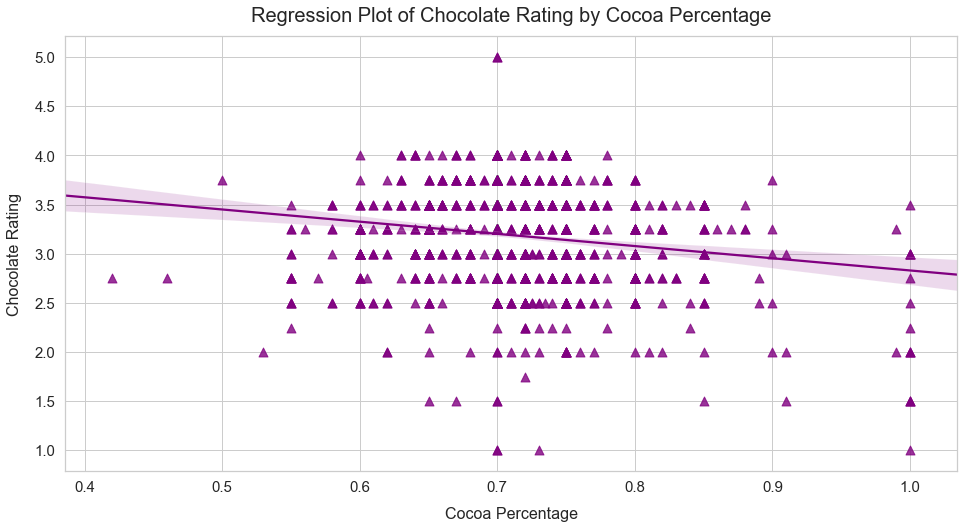

In [32]:
#Making Scatterplot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
sns.set(style="whitegrid")
plt.figure(figsize=(16,8))
sns.regplot(x="CocoaPercent", y="Rating", data=df,color = "purple",scatter_kws={'s':80}, marker="^")
plt.xlabel("Cocoa Percentage", fontsize='16', labelpad=12)
plt.ylabel("Chocolate Rating", fontsize='16', labelpad=12)
plt.title("Regression Plot of Chocolate Rating by Cocoa Percentage", fontsize='20', y=1.02);
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

<h3>7.3- Geographical Map of Country wise Average Chocolate Rating - Using Plotly and Matplotlib for this </h3>

In [38]:
#Code for creating columns and specific data required for geographical map
data_native_country = [df["Rating"], df["BroadBeanOriginModified"]]
headers = ["Rating", "BroadBeanOriginModified"]
df_native_country = pd.concat(data_native_country, axis=1, keys=headers)
df_native_country = df_native_country.dropna()
df_native_country.sort_values(by='Rating', inplace=True)
df_native_country = df_native_country.groupby(['BroadBeanOriginModified'])['Rating'].mean().reset_index()

dict_type_countries = { 'Madagascar':'MDG','Hawaii':'USA','Costa Rica':'CRI',
             'Nicaragua':'NIC','Colombia':'COL','Ecuador':'ECU', 'St. Lucia':'LCA',
             'Peru':'PER','Trinidad':'TTO','Venezuela':'VEN',
             'Dominican Republic':'DOM','Jamaica':'JAM','Vietnam':'VNM',
             
             'Mexico':'MEX','Honduras':'HMD','Guatemala':'GTM',
             'Sri Lanka':'LKA','Indonesia':'IDN','Puerto Rico':'PRI',
             'St Lucia':'LCA','Ghana':'GHA','Brazil':'BRA',
             
             'Ivory Coast':'CIV','Uganda':'UGA','Samoa':'WSM',
             'Tanzania':'TZA','Papua New Guinea':'PNG','Togo':'TGO',
             'Bolivia':'BOL','Panama':'PAN','Belize':'BLZ',
             
             'Vanuatu':'VUT','Fiji':'FJI',
             'Tobago':'TTO','Sao Tome':'STP','Cuba':'CUB',
             'Carribean':'CMR','Grenada':'GRD','Principe':'STP','Australia':'AUS','South America':'SA','Malaysia':'MYS',
             'Congo':'COG','Haiti':'HTI','Philippines':'PHI',
             'Suriname':'SUR','Martinique':'MLT','Solomon Islands':'SLB',
             
              'India':'IND','El Salvador':'SLV','West Africa':'WA',
             'Nigeria':'NGA','Liberia':'LBR','Burma':'MMR'
                 }
df_native_country.insert(2,'Code', df_native_country['BroadBeanOriginModified'].map(dict_type_countries))

In [39]:
#Plotly has to be installed on Jupyter notebook for this geographical map
#pip install plotly==4.8.1
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=go.Choropleth(
    locations = df_native_country['Code'],
    z = df_native_country['Rating'],
    text = df_native_country['BroadBeanOriginModified'],
    colorscale = 'Reds',
    autocolorscale = True,
    
    marker_line_color='darkgray',
    marker_line_width=0.5,
    
    colorbar_title = 'Rating',
    colorbar_title_font_size = 14,
    colorbar_xpad= 0,
    colorbar_thickness= 50,
    colorbar_len = 1.2,
    
))

fig.update_layout(
    title_text='Geographical Map of Country wise Average Chocolate Rating',
    title_x = 0.5,
    title_xanchor= 'center',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',
        
    ),
    
)

fig.show()

<h3>7.4- Treemap for Distribution of Chocolate Reviews for Years - Using Squarify for this </h3>

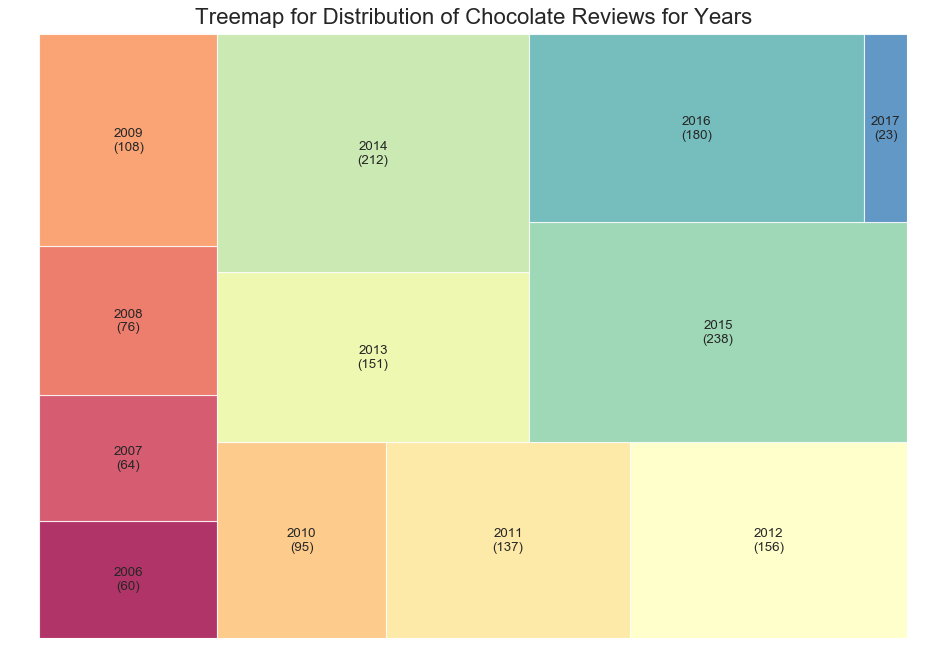

In [35]:
# Squarify has to be installed on jupyter notebook for this visualisation
#pip install squarify
import squarify 
# Import Data
data_raw_education = [df["ReviewDate"]]
headers = ["ReviewDate"]
df_raw_education = pd.concat(data_raw_education, axis=1, keys=headers)

# Prepare Data
df_raw_education = df_raw_education.groupby('ReviewDate').size().reset_index(name='counts')
labels = df_raw_education.apply(lambda x: str(x[0]) + "\n(" + str(x[1])+")", axis=1)
sizes = df_raw_education['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(14,10), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap for Distribution of Chocolate Reviews for Years', size ='20', pad='10')
plt.axis('off')
plt.rc('font', size=14, weight=13)
plt.show()